# Now let's look at this data plotted geospatially with MatPlotLib
### ---------------------------------------------------------------------------------------


## Matplotlib is straight up python plotting. It has a Basemap library.  But it will not get as pretty in the User Interface as people are used to like a Google Map.  It will work if something quick is needed.  Using Geopandas or Folium with their basemap tiles is better for finished products. But those also require different language adaptations.

### ------------------

In [2]:
#!/usr/bin/python
import json
import requests
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.basemap import Basemap
import io
%matplotlib inline


/Users/RoscoeBColtrane/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
bestPizza = pd.read_csv("../data/PizzaEssentials.csv",index_col=False)
restPandI = pd.read_csv("../data/restPandI.csv")
print(restPandI.shape)
allPizza = pd.read_csv("../data/restPizza.csv")
print(allPizza.shape)
subway = pd.read_csv("../data/subwayStations.csv", index_col=0)
print(subway.shape)


(31171, 12)
(31171, 12)
(473, 8)


## Geo Mapping with Matplotlib

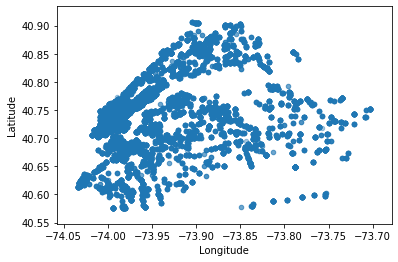

In [4]:
# The most simple way to see you data is like this!

restPandI.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.4)
plt.show()

No handles with labels found to put in legend.


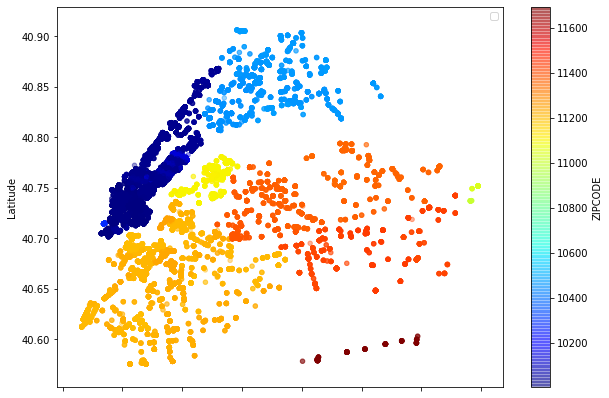

In [5]:
# And to add fun things like a color map and scale bar

restPandI.plot(kind="scatter", x="Longitude", y="Latitude",
    #s=housing['population']/100, label="population",
    c="ZIPCODE", cmap=plt.get_cmap("jet"),
    colorbar=True, alpha=0.4, figsize=(10,7),
)
plt.legend()
plt.show()

## Now with the Basemaps Library 

In [6]:
help(Basemap)

Help on class Basemap in module mpl_toolkits.basemap:

class Basemap(builtins.object)
 |  Basemap(llcrnrlon=None, llcrnrlat=None, urcrnrlon=None, urcrnrlat=None, llcrnrx=None, llcrnry=None, urcrnrx=None, urcrnry=None, width=None, height=None, projection='cyl', resolution='c', area_thresh=None, rsphere=6370997.0, ellps=None, lat_ts=None, lat_1=None, lat_2=None, lat_0=None, lon_0=None, lon_1=None, lon_2=None, o_lon_p=None, o_lat_p=None, k_0=None, no_rot=False, suppress_ticks=True, satellite_height=35786000, boundinglat=None, fix_aspect=True, anchor='C', celestial=False, round=False, epsg=None, ax=None)
 |  
 |  Methods defined here:
 |  
 |  __call__(self, x, y, inverse=False)
 |      Calling a Basemap class instance with the arguments lon, lat will
 |      convert lon/lat (in degrees) to x/y map projection
 |      coordinates (in meters).  If optional keyword ``inverse`` is
 |      True (default is False), the inverse transformation from x/y
 |      to lon/lat is performed.
 |      
 | 

In [ ]:

# read in data to use for plotted points
lat = restPandI['Latitude'].values
lon = restPandI['Longitude'].values

# determine range to print based on min, max lat and lon of the data
margin = .1 # buffer to add to the range
lat_min = min(lat) - margin
lat_max = max(lat) + margin
lon_min = min(lon) - margin
lon_max = max(lon) + margin

# create map using BASEMAP
bmap = Basemap(llcrnrlon=lon_min,
            llcrnrlat=lat_min,
            urcrnrlon=lon_max,
            urcrnrlat=lat_max,
            lat_0=(lat_max - lat_min)/2,
            lon_0=(lon_max-lon_min)/2,
            epsg='4326',
            resolution = 'h',
            area_thresh=1000.,
            )
bmap.drawstates(color='gray',linewidth=0.25)
bmap.drawcoastlines(linewidth=0.25)
bmap.drawcountries(linewidth=0.25)
bmap.fillcontinents(lake_color='aqua')
bmap.drawmapboundary(fill_color='lightblue')

# convert lat and lon to map projection coordinates
x,y = bmap(lon, lat)
bmap.plot(x, y, ".",'bo', markersize=1)
plt.title('NYC Pizza Places', fontsize=25)
# SETTING THE LEGEND
plt.legend(loc="upper left",title='Legend', markerscale=5,
           frameon=True,facecolor='white', edgecolor='k',fancybox=True,framealpha=1,fontsize=7,title_fontsize=7)

plt.rcParams['figure.dpi'] = 400
plt.show()


### Below we try to change the basemap to shadedrelief but we are too zoomed in to see it

/Users/RoscoeBColtrane/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning:


The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.

/Users/RoscoeBColtrane/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning:


The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.



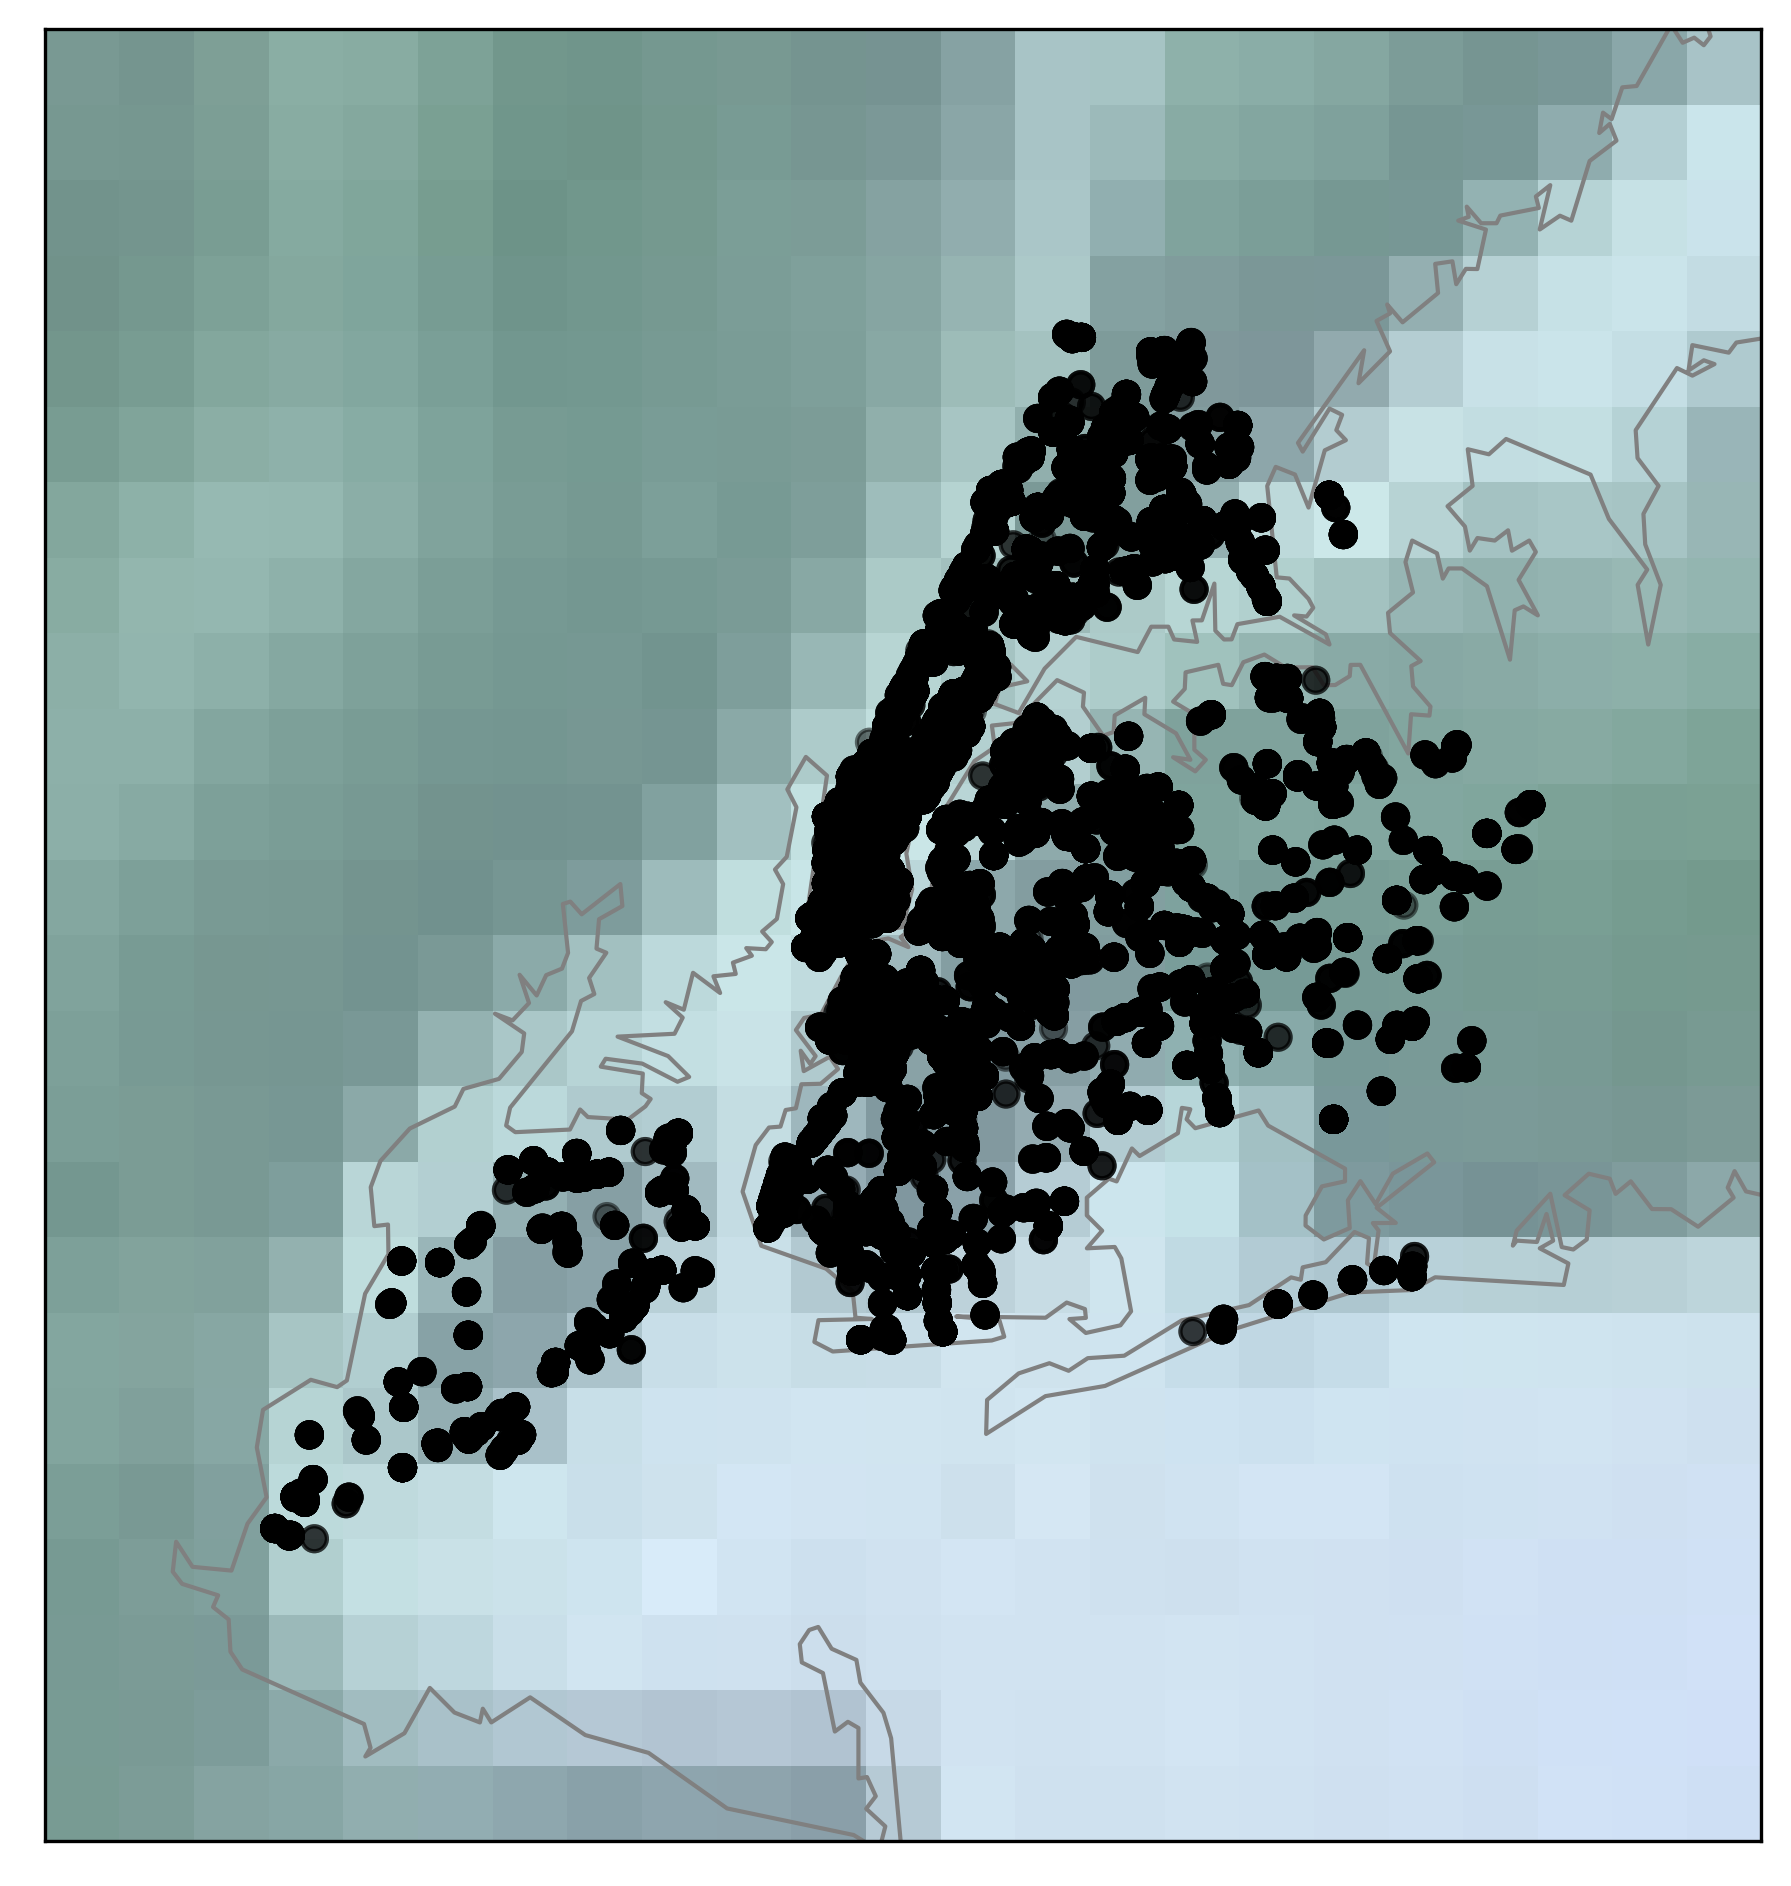

In [92]:
# read in data to use for plotted points
lat = restPandI['Latitude'].values
lon = restPandI['Longitude'].values
population = restPandI['ZIPCODE'].values

fig = plt.figure(figsize=(8, 8))
m = Basemap(llcrnrlon=lon_min,
            llcrnrlat=lat_min,
            urcrnrlon=lon_max,
            urcrnrlat=lat_max,
            lat_0=(lat_max - lat_min)/2,
            lon_0=(lon_max-lon_min)/2,
            projection='merc',
            resolution = 'h',
            area_thresh=1000.,
            )
            #width=1.05E6, 
            #height=1.2E6)
# trying with shaded relief basemap
m.shadedrelief()

m.drawcoastlines(color='gray',linewidth=1)
m.drawcountries(color='gray',linewidth=1)
#m.drawstates(color='gray')

lons, lats = m(lon, lat)
# scatter city data, with c reflecting population
m.scatter(lon,lat, latlon=True,
          c=population, marker='o', zorder=5,
          cmap='gist_heat', alpha=0.5)
#create colorbar 
#plt.colorbar(label=r'Population')
plt.clim(300000, 4000000)

## Here's a full list of colormap (cmap) options

ValueError: Colormap Perceptually Uniform Sequential is not recognized. Possible values are: Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, twilight, twilight_r, twilight_shifted, twilight_shifted_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r